In [20]:
#importing libraries for creating dataframe, numerical operations, spliting the dataset into test and train, library for splitting the, for performance metric calculation.
import numpy as np                                  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import seaborn as sn
import cv2
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics 

In [21]:
# read the dataset
digits = pd.read_csv('train.csv')
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [22]:
# head - For showing top 5 records
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#show casing one of the and its shape
four = digits.iloc[3, 1:]
four.shape

(784,)

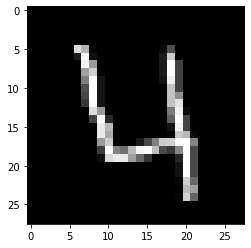

In [24]:
#reshaping it the above variable into 28*8 and show casing it
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')

In [25]:
# average values/distributions of features
description = digits.describe()
description

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# splitting the data into training and testing test

In [26]:
# Creating training and test sets
# Splitting the data into train and test
X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)           #feature scaling the label's column

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.90, random_state=101)    #spliting the data into test and train data
print(x_train.shape)  #printing the shape of x_train
print(x_test.shape)  #printing the shape of x_test
print(y_train.shape)  #printing the shape of y_train
print(y_test.shape)  #printing the shape of y_test


(37800, 784)
(4200, 784)
(37800,)
(4200,)


# svm classifier - without  tunning hyper parameters 

In [27]:
svm_linear = svm.SVC(kernel='linear')           #an initial SVM model with linear kernel 
svm_linear.fit(x_train, y_train)                #fit the model into the svm_linear model

SVC(kernel='linear')

In [28]:
predictions = svm_linear.predict(x_test) #predict the values using x_test variables
predictions[:10]                         #printing the 10 records

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6], dtype=int64)

In [29]:
metrics.accuracy_score(y_true=y_test, y_pred=predictions) # measure accuracy for the svm ml algorithm without using hyper parameters

0.9178571428571428

In [30]:
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions) #printing the classification report
print(class_wise)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       409
           1       0.94      0.99      0.97       448
           2       0.91      0.90      0.91       416
           3       0.89      0.89      0.89       416
           4       0.88      0.92      0.90       411
           5       0.88      0.88      0.88       365
           6       0.96      0.97      0.96       427
           7       0.94      0.92      0.93       437
           8       0.92      0.85      0.89       416
           9       0.89      0.87      0.88       455

    accuracy                           0.92      4200
   macro avg       0.92      0.92      0.92      4200
weighted avg       0.92      0.92      0.92      4200



Accuracy Score: 0.918
Precision: 0.919
F1 Score: 0.918
Recall Score: 0.918


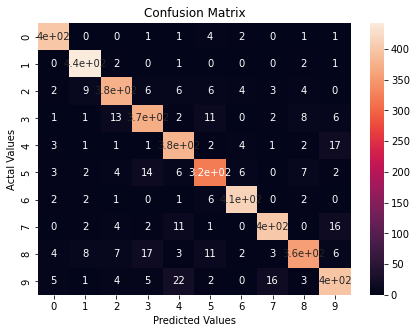

In [31]:
print('Accuracy Score: %.3f' % accuracy_score(predictions, y_test))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(predictions, y_test,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(predictions, y_test, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(predictions, y_test, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test, predictions)               #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                                 #making the confusion matrix as a dataframe
plt.figure(figsize=(7,5))                                #declaring the figure size
sn.heatmap(cm_df, annot=True)                            #ploting the confusion matrix
plt.title('Confusion Matrix')                            #ploting the title
plt.ylabel('Actal Values')                               #ploting the actual value
plt.xlabel('Predicted Values')                           #ploting the predicted value
plt.show()                                               #showing the plot 

# Grid Search Algorithm to find the optimum hyper-parameter

In [32]:
m = svm.SVC()                                    #decalring SVM
param_grid={'C': [10], 'break_ties':[ False], 'cache_size':[ 200], 'class_weight': [None], 'coef0': [0.0], 'decision_function_shape': ['ovr'], 'degree': [3], 'gamma': ['scale'], 'kernel': ['rbf'], 'max_iter': [-1], 'probability': [False], 'random_state': [None], 'shrinking': [True], 'tol': [0.001], 'verbose': [False]}   #declaring parameters for the grid search algorithm
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)  #performing the grid search for finding the optimum parameter
grid.fit(x_train, y_train)                     #training train data on grid model
grid_predictions = grid.predict(x_test)        #making prediction for grid model
print("best",grid.best_params_)                #printing the grid parameters

Fitting 5 folds for each of 1 candidates, totalling 5 fits
best {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [33]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=grid_predictions) # class-wise classification_report for svm_linear model
print(class_wise)  #printing the above report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       409
           1       0.99      0.99      0.99       448
           2       0.92      0.97      0.95       416
           3       0.98      0.95      0.96       416
           4       0.95      0.98      0.96       411
           5       0.97      0.95      0.96       365
           6       0.98      0.98      0.98       427
           7       0.96      0.96      0.96       437
           8       0.97      0.95      0.96       416
           9       0.96      0.94      0.95       455

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



Accuracy Score: 0.967
Precision: 0.967
F1 Score: 0.967
Recall Score: 0.967


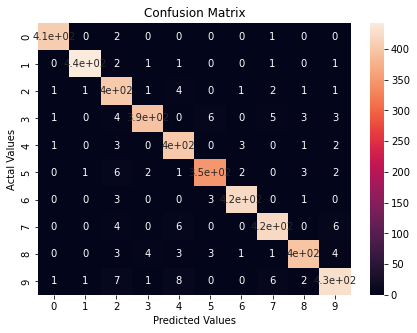

In [34]:
print('Accuracy Score: %.3f' % accuracy_score(grid_predictions, y_test))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(grid_predictions, y_test,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(grid_predictions, y_test, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(grid_predictions, y_test, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test, grid_predictions)    #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                           #converting the confusion matrix into a dataframe
plt.figure(figsize=(7,5))                          #declaring the size of the plot
sn.heatmap(cm_df, annot=True)                      #ploting the confusion matrix
plt.title('Confusion Matrix')                      #printing the title
plt.ylabel('Actal Values')                         #printing the ylabel
plt.xlabel('Predicted Values')                     #printing the xlabel
plt.show()                                         #ploting the graph

# Naïve Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB                #importing the library for naieve bayes
model_GNB = GaussianNB()                                  #declaring the NB models
model_GNB.fit(x_train,y_train)                            #training the model                             
y_pred_nb = model_GNB.predict(x_test)                     #testing the model
accuracy_score(y_pred_nb,y_test)                          #printing the accuracy score

0.5466666666666666

Accuracy Score: 0.547
Precision: 0.791
F1 Score: 0.600
Recall Score: 0.547


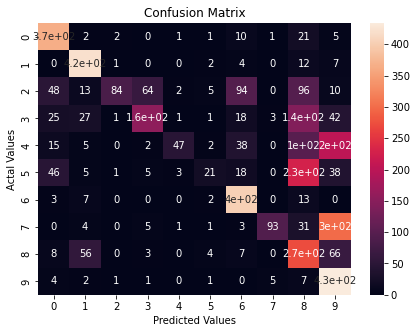

In [36]:
print('Accuracy Score: %.3f' % accuracy_score(y_pred_nb, y_test))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(y_pred_nb, y_test,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(y_pred_nb, y_test, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(y_pred_nb, y_test, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test, y_pred_nb)         #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                         #converting the confusion matrix into a dataframe
plt.figure(figsize=(7,5))                        #declaring the size of the plot
sn.heatmap(cm_df, annot=True)                    #ploting the confusion matrix
plt.title('Confusion Matrix')                    #printing the title
plt.ylabel('Actal Values')                       #printing the ylabel
plt.xlabel('Predicted Values')                   #printing the xlabel
plt.show()                                       #ploting the graph

In [37]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred_nb)# class-wise classification_report for svm_linear model
print(class_wise)  #printing the above report

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       409
           1       0.78      0.94      0.85       448
           2       0.93      0.20      0.33       416
           3       0.66      0.37      0.48       416
           4       0.85      0.11      0.20       411
           5       0.53      0.06      0.10       365
           6       0.68      0.94      0.79       427
           7       0.91      0.21      0.35       437
           8       0.29      0.65      0.41       416
           9       0.39      0.95      0.56       455

    accuracy                           0.55      4200
   macro avg       0.67      0.53      0.49      4200
weighted avg       0.67      0.55      0.49      4200



# Grid search for Naive Bayes

In [38]:
from sklearn.model_selection import RepeatedStratifiedKFold           #importing libraries for performing the grid search
from sklearn.preprocessing import PowerTransformer
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)  #declaring the cv parameter for finding optimum parameter for NB
                                    
print(np.logspace(0,-9, num=10))
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}             #decalring the varsmooth function

gs_NB = GridSearchCV(estimator=model_GNB,                             #performing the grid search
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_test)           #transforming the data

gs_NB.fit(x_train,y_train)                                            #training the model                                        

print("best hyperparameters:",gs_NB.best_params_)                     #printing best hyper parameters
print("best score:",gs_NB.best_score_)                                #printing the best score
grid_predictions_nb = gs_NB.predict(x_test)                           #testing the grid model

print(metrics.classification_report(y_test, grid_predictions))        #printing the classification report

[1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09]
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
best hyperparameters: {'var_smoothing': 0.0533669923120631}
best score: 0.6831922398589065
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       409
           1       0.99      0.99      0.99       448
           2       0.92      0.97      0.95       416
           3       0.98      0.95      0.96       416
           4       0.95      0.98      0.96       411
           5       0.97      0.95      0.96       365
           6       0.98      0.98      0.98       427
           7       0.96      0.96      0.96       437
           8       0.97      0.95      0.96       416
           9       0.96      0.94      0.95       455

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



Accuracy Score: 0.690
Precision: 0.762
F1 Score: 0.695
Recall Score: 0.690


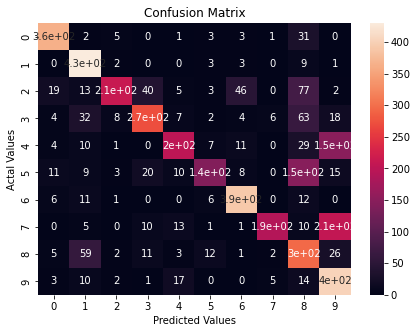

In [39]:
print('Accuracy Score: %.3f' % accuracy_score(grid_predictions_nb, y_test))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(grid_predictions_nb, y_test,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(grid_predictions_nb, y_test, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(grid_predictions_nb, y_test, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test, grid_predictions_nb)             #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                                       #converting the confusion matrix into a dataframe
plt.figure(figsize=(7,5))                                      #declaring the size of the plot
sn.heatmap(cm_df, annot=True)                                  #ploting the confusion matrix
plt.title('Confusion Matrix')                                  #printing the title
plt.ylabel('Actal Values')                                     #printing the ylabel
plt.xlabel('Predicted Values')                                 #printing the xlabel
plt.show()                                                     #ploting the graph

# Question 2

In [40]:
from PIL import Image           #importing librabries for scanning and converting the images to csv
import numpy as np
import sys
import os
import csv
import pandas as pd
from sklearn import preprocessing
columnNames = list()

for i in range(784):                                      #creating label names for the csv headers 
    pixel = 'label'
    pixel += str(i)
    columnNames.append(pixel)

# default format can be changed as needed
def createFileList(myDir, format='.jpg'):                 #logic for going into the directory and fetching the file
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList('C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/')  #original path
train_data = pd.DataFrame(columns = columnNames) #creating data frame with labels as headers
for file in myFileList:                          #loop counter
    print(file)                                  #printing the file name
    img_file = Image.open(file)                  #opening the image file
    # img_file.show()

    # Make image Greyscale
    img_grey = img_file.convert('L')            #converting the image into grayscale
    #img_grey.save('result.png')
    #img_grey.show()

    rawData = img_grey.load()                   #loading the image to greyscale
    
    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))  #converting the data into np array  
    value = value.flatten()         #flattening the data 
    #print(value)
    k = 0
        #print data  
    train_data.loc[i] = [value[k] for k in range(784)]           #feeding the above values to traindata variable
    i=i+1
print(train_data)                                                #printing the traindata
train_data.to_csv("train_converted.csv",index = False)           #printing the traindata to csv                                     

C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/0\img_1.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/0\img_108.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/0\img_110.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/0\img_111.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/0\img_114.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/0\img_129.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assign

C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/1\img_77.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/1\img_79.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/1\img_96.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/2\img_101.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/2\img_104.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/2\img_112.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/2\img_16.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semest

C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/3\img_57.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/3\img_581.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/3\img_596.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/3\img_597.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/3\img_606.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/3\img_610.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/3\img_615.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Sem

C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/5\img_539.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/5\img_543.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/5\img_557.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/5\img_561.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/5\img_569.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/5\img_571.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/5\img_580.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Se

C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/7\img_393.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/7\img_408.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/7\img_436.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/7\img_452.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/7\img_464.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/7\img_47.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/7\img_478.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Sem

C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/9\img_28.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/9\img_280.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/9\img_283.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/9\img_296.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/9\img_303.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/9\img_305.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Final/Assignment_5_Part2/9\img_307.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Sem

In [41]:
# read the dataset
digits_1 = pd.read_csv('train_converted.csv')
digits_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 784 entries, label0 to label783
dtypes: int64(784)
memory usage: 3.6 MB


In [42]:
idx = 0 #declaring the index values
target = []       #declaring the target empty variable
for i in range(10):        #first for loop counter
    for j in range(60):    #second for loop counter    
        target.append(i)   #apending the above values to target variable
print(target)              #printing the target variable

digits_1.insert(loc=idx, column='target', value=target)  #adding the above variables into our dataframe
digits_1  #showcasing the dataframe

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

,target,label0,label1,label2,label3,label4,label5,label6,label7,label8,...,label774,label775,label776,label777,label778,label779,label780,label781,label782,label783
0,0,3,0,0,3,7,3,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,9,0,0,0,0,0,0,0,0,2,...,17,2,0,1,3,0,0,0,0,0
597,9,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
598,9,0,0,0,0,0,0,0,0,7,...,0,0,2,2,1,0,0,0,0,0


In [43]:
from sklearn.utils import shuffle    #package for shuffling the dataframe
digits_1 = shuffle(digits_1)         #shuffling operation         
digits_1                             #showcasing the digits after shuffling

,target,label0,label1,label2,label3,label4,label5,label6,label7,label8,...,label774,label775,label776,label777,label778,label779,label780,label781,label782,label783
251,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
557,9,0,0,0,0,0,0,0,0,4,...,0,2,15,6,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2,0,0,0,2,0,0,0,4,13,...,0,0,0,0,0,0,0,0,0,0
81,1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
65,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,7,0,0,0,0,0,0,0,0,0,...,0,0,0,5,4,2,0,0,0,0


In [44]:
#show casing one of the and its shape
four = digits_1.iloc[3, 1:]
four.shape

(784,)

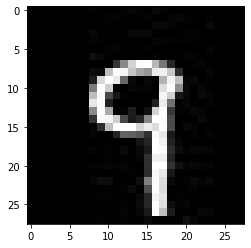

In [45]:
#reshaping it the above variable into 28*28 and show casing it
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')

In [46]:
# Creating training and test sets
# Splitting the data into train and test
X_c = digits_1.iloc[:, 1:]
Y_c = digits_1.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X_c = scale(X_c)            #feature scaling the label's column

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test_C = train_test_split(X_c, Y_c, train_size=0.800, random_state=101)         #spliting the data into test and train data
print(x_train.shape)        #printing the shape of x_train
print(x_test.shape)         #printing the shape of x_test
print(y_train.shape)        #printing the shape of y_train
print(y_test_C.shape)       #printing the shape of y_test

(480, 784)
(120, 784)
(480,)
(120,)


# SVM Classifier without hyperparameter tunning

In [47]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')           #an initial SVM model with linear kernel 

# fit
svm_linear.fit(x_train, y_train)                #fit the model into the svm_linear model


# predict
predictions_C = svm_linear.predict(x_test)      #predict the values using x_test variables
predictions_C[:10]                              #printing the 10 records

array([3, 6, 5, 3, 6, 6, 0, 9, 1, 7], dtype=int64)

In [48]:
# measure accuracy
metrics.accuracy_score(y_true=y_test_C, y_pred=predictions_C) # measure accuracy for the svm ml algorithm without using hyper parameters

0.8416666666666667

In [49]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test_C, y_pred=predictions_C)# class-wise classification_report for svm_linear model
print(class_wise)  #printing the above report

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.87      1.00      0.93        13
           2       0.86      0.86      0.86         7
           3       0.82      0.75      0.78        12
           4       0.86      0.80      0.83        15
           5       0.75      0.75      0.75        16
           6       0.80      1.00      0.89         8
           7       0.88      0.88      0.88         8
           8       0.86      0.80      0.83        15
           9       0.77      0.83      0.80        12

    accuracy                           0.84       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.85      0.84      0.84       120



Accuracy Score: 0.842
Precision: 0.848
F1 Score: 0.842
Recall Score: 0.842


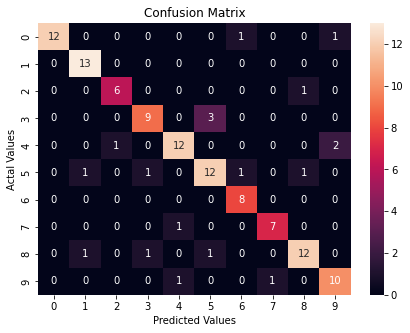

In [50]:
print('Accuracy Score: %.3f' % accuracy_score(predictions_C, y_test_C))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(predictions_C, y_test_C,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(predictions_C, y_test_C, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(predictions_C, y_test_C, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test_C, predictions_C)                   #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                         #converting the confusion matrix into a dataframe
plt.figure(figsize=(7,5))                        #declaring the size of the plot
sn.heatmap(cm_df, annot=True)                    #ploting the confusion matrix
plt.title('Confusion Matrix')                    #printing the title
plt.ylabel('Actal Values')                       #printing the ylabel
plt.xlabel('Predicted Values')                   #printing the xlabel
plt.show()                                       #ploting the graph

# Grid Search Algorithm

In [51]:
m = svm.SVC()             #decalring SVM

param_grid={'C': [10], 'break_ties':[ False], 'cache_size':[ 200], 'class_weight': [None], 'coef0': [0.0], 'decision_function_shape': ['ovr'], 'degree': [3], 'gamma': ['scale'], 'kernel': ['rbf'], 'max_iter': [-1], 'probability': [False], 'random_state': [None], 'shrinking': [True], 'tol': [0.001], 'verbose': [False]}  #declaring parameters for the grid search algorithm
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)  #performing the grid search for finding the optimum parameter
   
grid.fit(x_train, y_train)                   #training train data on grid model

grid_predictions_i = grid.predict(x_test)    #making prediction for grid model


print(metrics.classification_report(y_test_C, grid_predictions_i))  #prinitng the classification reports

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.92      0.92      0.92        13
           2       0.60      0.86      0.71         7
           3       0.83      0.83      0.83        12
           4       0.86      0.80      0.83        15
           5       0.76      0.81      0.79        16
           6       0.70      0.88      0.78         8
           7       0.83      0.62      0.71         8
           8       0.93      0.87      0.90        15
           9       0.75      0.75      0.75        12

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.81       120
weighted avg       0.84      0.82      0.83       120



Accuracy Score: 0.825
Precision: 0.829
F1 Score: 0.823
Recall Score: 0.825


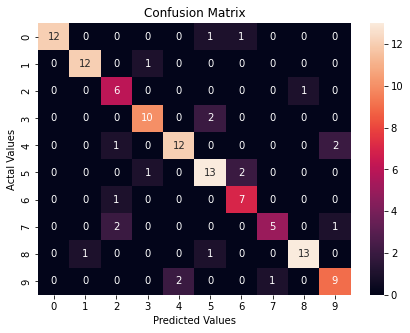

In [52]:
print('Accuracy Score: %.3f' % accuracy_score(grid_predictions_i, y_test_C))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(grid_predictions_i, y_test_C,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(grid_predictions_i, y_test_C, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(grid_predictions_i, y_test_C, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test_C, grid_predictions_i)            #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                         #converting the confusion matrix into a dataframe
plt.figure(figsize=(7,5))                        #declaring the size of the plot
sn.heatmap(cm_df, annot=True)                    #ploting the confusion matrix
plt.title('Confusion Matrix')                    #printing the title
plt.ylabel('Actal Values')                       #printing the ylabel
plt.xlabel('Predicted Values')                   #printing the xlabel
plt.show()                                       #ploting the graph

# Naïve Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB           #importing the library for naieve bayes
model_GNB = GaussianNB()                             #declaring the NB models
model_GNB.fit(x_train,y_train)                       #training the model
y_pred_nbc = model_GNB.predict(x_test)               #testing the model
accuracy_score(y_pred_nbc,y_test_C)                  #printing the accuracy score

0.5833333333333334

Accuracy Score: 0.583
Precision: 0.669
F1 Score: 0.592
Recall Score: 0.583


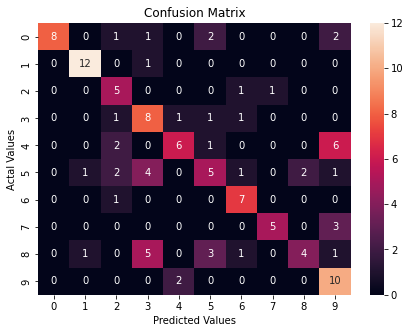

In [54]:
print('Accuracy Score: %.3f' % accuracy_score(y_pred_nbc, y_test_C))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(y_pred_nbc, y_test_C,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(y_pred_nbc, y_test_C, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(y_pred_nbc, y_test_C, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test_C, y_pred_nbc)            #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                         #converting the confusion matrix into a dataframe
plt.figure(figsize=(7,5))                        #declaring the size of the plot
sn.heatmap(cm_df, annot=True)                    #ploting the confusion matrix
plt.title('Confusion Matrix')                    #printing the title
plt.ylabel('Actal Values')                       #printing the ylabel
plt.xlabel('Predicted Values')                   #printing the xlabel
plt.show()                                       #ploting the graph

# Grid Search with Naive Bayes

In [55]:
from sklearn.model_selection import RepeatedStratifiedKFold                           #importing libraries for performing the grid search
from sklearn.preprocessing import PowerTransformer
cv_method = RepeatedStratifiedKFold(n_splits=5,                                       #declaring the cv parameter for finding optimum parameter for NB
                                    n_repeats=3, 
                                    random_state=999)
print(np.logspace(0,-9, num=10))
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}                             #decalring the varsmooth function

gs_NB = GridSearchCV(estimator=model_GNB,                                             #performing the grid search
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_test)                            #transforming the data

gs_NB.fit(x_train,y_train)                                                             #training the model

print("best hyperparameters:",gs_NB.best_params_)                                      #printing best hyper parameters
print("best score:",gs_NB.best_score_)                                                 #printing the best score
grid_predictions_nbi = gs_NB.predict(x_test)                                           #testing the grid model

print(metrics.classification_report(y_test_C, grid_predictions_nbi))                    #printing the classification report

[1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09]
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
best hyperparameters: {'var_smoothing': 0.01519911082952933}
best score: 0.695138888888889
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.80      0.92      0.86        13
           2       0.75      0.86      0.80         7
           3       1.00      0.83      0.91        12
           4       0.86      0.40      0.55        15
           5       0.50      0.50      0.50        16
           6       0.67      1.00      0.80         8
           7       1.00      0.62      0.77         8
           8       0.67      0.53      0.59        15
           9       0.48      0.92      0.63        12

    accuracy                           0.72       120
   macro avg       0.77      0.74      0.73       120
weighted avg       0.76      0.72      0.71       120



Accuracy Score: 0.717
Precision: 0.773
F1 Score: 0.719
Recall Score: 0.717


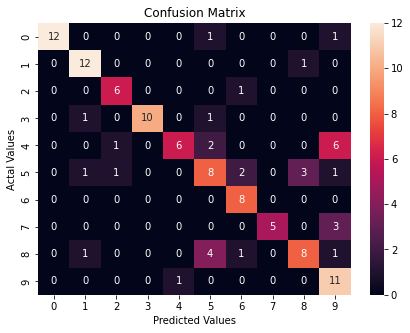

In [56]:
print('Accuracy Score: %.3f' % accuracy_score(grid_predictions_nbi, y_test_C))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(grid_predictions_nbi, y_test_C,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(grid_predictions_nbi, y_test_C, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(grid_predictions_nbi, y_test_C, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test_C, grid_predictions_nbi)                     #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                                       #converting the confusion matrix into a dataframe
plt.figure(figsize=(7,5))                                      #declaring the size of the plot
sn.heatmap(cm_df, annot=True)                                  #ploting the confusion matrix
plt.title('Confusion Matrix')                                  #printing the title
plt.ylabel('Actal Values')                                     #printing the ylabel
plt.xlabel('Predicted Values')                                 #printing the xlabel
plt.show()                                                     #ploting the graph

# Computing the accuracy metric in For Step1C and Step2C for SVM ML Model with grid search hyper parameters

In [57]:
accuracy_score_DSVM=accuracy_score(y_true=y_test, y_pred=grid_predictions)            #calculating the accuracy score of svm for csv dataset  
accuracy_score_CSVM=accuracy_score(grid_predictions_i, y_test_C)                      #calculating the accuracy score of svm for image converted csv dataset
precision_score_DSVM=precision_score(grid_predictions, y_test,average='weighted')     #calculating the precesion score of svm for csv dataset 
precision_score_CSVM=precision_score(grid_predictions_i, y_test_C,average='weighted') #calculating the precesion score of svm for image converted csv dataset 
f1_score_DSVM=f1_score(grid_predictions, y_test,average='weighted')                   #calculating the f1 score of svm for csv dataset
f1_score_CSVM=f1_score(grid_predictions_i, y_test_C,average='weighted')               #calculating the f1 score of svm for image converted csv data
recall_score_DSVM=recall_score(grid_predictions, y_test,average='weighted')           #calculating the recall score of svm for csv dataset
recall_score_CSVM=recall_score(grid_predictions_i, y_test_C,average='weighted')       #calculating the recall score of svm for image converted csv data
data_list = [['accuracy_score', accuracy_score_DSVM, accuracy_score_CSVM],            #making row and column headers
             ['precision_score', precision_score_DSVM, precision_score_CSVM],
             ['f1_score', f1_score_DSVM, f1_score_CSVM],
             ['recall_score', recall_score_DSVM, recall_score_CSVM]]
df_SVM = pd.DataFrame(data=data_list, columns=[
                  'Metric', 'MNIST_Excel_Data', 'MNIST_Image_Converted_Data'])         #making the dataframe and printing it
df_SVM

,Metric,MNIST_Excel_Data,MNIST_Image_Converted_Data
0,accuracy_score,0.967143,0.825000
1,precision_score,0.967326,0.829191
2,f1_score,0.967102,0.822759
3,recall_score,0.967143,0.825000


In [58]:
accuracy_score_DNB=accuracy_score(grid_predictions_nb,y_test)                           #calculating the accuracy score of nb for csv dataset  
accuracy_score_CNB=accuracy_score(grid_predictions_nbi, y_test_C)                       #calculating the accuracy score of nb for image converted csv dataset
precision_score_DNB=precision_score(grid_predictions_nb, y_test,average='weighted')     #calculating the precesion score of nb for csv dataset
precision_score_CNB=precision_score(grid_predictions_nbi, y_test_C,average='weighted')  #calculating the precesion score of nb for image converted csv dataset 
f1_score_DNB=f1_score(grid_predictions_nb, y_test,average='weighted')                   #calculating the f1 score of nb for csv dataset
f1_score_CNB=f1_score(grid_predictions_nbi, y_test_C,average='weighted')                #calculating the f1 score of nb for image converted csv data                  
recall_score_DNB=recall_score(grid_predictions_nb, y_test,average='weighted')           #calculating the recall score of nb for csv dataset
recall_score_CNB=recall_score(grid_predictions_nbi, y_test_C,average='weighted')        #calculating the recall score of nb for image converted csv data
data_list = [['accuracy_score', accuracy_score_DNB, accuracy_score_CNB],                #making row and column headers
             ['precision_score', precision_score_DNB, precision_score_CNB],
             ['f1_score', f1_score_DNB, f1_score_CNB],
             ['recall_score', recall_score_DNB, recall_score_CNB]]
df_NB = pd.DataFrame(data=data_list, columns=[
                  'Metric', 'MNIST_Excel_Data', 'MNIST_Image_Converted_Data'])           #making the dataframe and printing it
df_NB

,Metric,MNIST_Excel_Data,MNIST_Image_Converted_Data
0,accuracy_score,0.690000,0.716667
1,precision_score,0.762489,0.772756
2,f1_score,0.694611,0.718813
3,recall_score,0.690000,0.716667


# Step 3 - PCA

In [59]:
import keras                                 #importing keras
from keras.datasets import mnist             #importing mnist dataset
import matplotlib.pyplot as plt              #importing matplotlib
import matplotlib.image as mpimg             #importing matplotlib mpimg

In [60]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()   #dividing the dataset into test and train

print(y_train)                     #printing y_train
x_train.shape                      #printing x_train


[5 0 4 ... 5 6 8]


(60000, 28, 28)

In [61]:
x_train_flat = x_train.flatten().reshape(60000, 784)      #flattening x_train

In [62]:

x_train_flat.shape                                        #printing the shape of flatten dataframe

(60000, 784)

In [63]:
x_df = pd.DataFrame(data = x_train_flat)                  #creating a new dataframe
x_df['target'] = y_train                                  #apending the target variable to new df
     

In [64]:
#taking the sampple data from the dataframe
t_5_8 = [5,8]
x_5 = x_df[x_df['target'] == t_5_8[0]]
x_8 = x_df[x_df['target'] == t_5_8[1]]
print(x_5.shape)
x_8.shape

(5421, 785)


(5851, 785)

# Sampling from large dataset

In [65]:
train_sample_5 = x_5.sample(n = 200)          #taking 200 samples for x_8
train_sample_8 = x_8.sample(n = 200)          #taking 200 samples from x_8
index_5 = train_sample_5.index.tolist()       #converting it into list
index_8 = train_sample_8.index.tolist()       #converting it into list

test_sample_5 = x_5[~x_5.index.isin(index_5)].sample(n=50) #taking 50 samples
test_sample_8 = x_8[~x_8.index.isin(index_8)].sample(n=50) #taking 50 samples

In [66]:
train = pd.concat([train_sample_5,train_sample_8]) #concatinating the above 2 dataframes to 2 dataframe
train.sample(frac = 1).reset_index(drop= True)     #reseting index
train_y = train['target']                          #declaring train y
train_x = train.drop(labels = 'target', axis = 1)  #droping labels from train dataframe
test = pd.concat([test_sample_5,test_sample_8])    #concatinating the above dataframe to create test dataframe
test.sample(frac = 1).reset_index(drop= True)      #dropping the index
test_y = test['target']                            #creating the target variable
test_x = test.drop(labels = 'target', axis = 1)    #creating the test variable
print(train_x.shape)                               #printing train.shape
test_x.shape                                       #printing test shape

(400, 784)


(100, 784)

# Calculating the mean vector of train data

In [67]:

train_mean_vector = np.array([train_x.mean(axis =0)])           #calculating the mean data of train dataframe
train_mean_vector = train_mean_vector.T                         #calculating the transpose

In [68]:
train_mean_vector.shape                                         #ploting the shape

(784, 1)

# Covariance

In [69]:

covar_train = train_x.cov()                               #plotting the covariance matrix
covar_train.shape                                         #ploting the shape
     

(784, 784)

# Eigenvectors and Eigen values

In [70]:

covar_train_eigen_val, covar_train_eigen_vec = np.linalg.eig(covar_train)        #calculating the eigen values
covar_train_eigen_vec.shape                                                      #Ploting the shape
     

(784, 784)

In [71]:
#making the eigen value and eigen vectors into array
covar_train_eigen_pair = [(np.abs(covar_train_eigen_val[i]), covar_train_eigen_vec[:,i]) for i in range(len(covar_train_eigen_val))]
covar_train_eigen_pair.sort(key = lambda t:t[0], reverse = True) 


In [72]:
covar_train_eigen_pair[0] # highest eigen value and respective eigen vector



(354013.89912225376,
 array([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.000

# For reducing dimension to 10, pick first 10 largest eigen values and corresponding eigen vector


In [75]:
W = covar_train_eigen_pair[0][1].reshape(784,1)                                  #reshaping the eigen vectors and eigen values                                                          
for i in range(1,10):                                                            #for loop
    W = np.hstack((W, covar_train_eigen_pair[i][1].reshape(784,1)))                            
  

In [76]:
train_x_10 = (W.T).dot((train_x.T))                                              # taking dot of W and train_x 
train_x_10.shape                                                                    
test_x_10 = (W.T).dot((test_x.T))                                                # taking dot of W and test_x
test_x_10.shape

(10, 100)

# PCA WHITENING

(10, 10)


<AxesSubplot:>

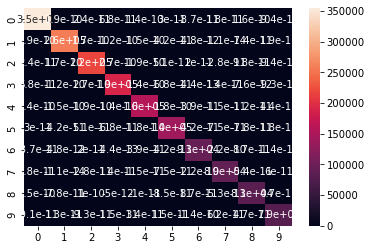

In [77]:
train_x_covar = np.cov(train_x_10)                                               #computing the covarience matrix        
train_x_covar_10 = np.array(train_x_covar, dtype=float)                          #converting the covarience matrix to np array 
print(train_x_covar.shape)                                                       #printing the covarience matrix
sn.heatmap(train_x_covar_10, annot=True)                                         #ploting the covarience matrix

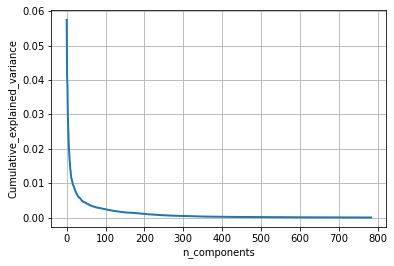

In [78]:
# PCA for dimensionality redcution (non-visualization)

# using SKlearn importing PCA
from sklearn import decomposition                    #import packages
pca = decomposition.PCA()                            #performing PCA decomposition

pca.n_components = 784                               #declaring the n components
pca_data = pca.fit_transform(X)                      #Performing the fit transform to X

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);   #Percentage var explained 

cum_var_explained = np.cumsum(percentage_var_explained)           #cur_var_explained

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))                                     #plot figure

plt.clf()                                                                                                       
plt.plot(percentage_var_explained, linewidth=2)                   #plot percentage_var_explained
plt.axis('tight')                                                 #plot axis                                      
plt.grid()                                                        #plot grid 
plt.xlabel('n_components')                                        #Ploting xlabel 
plt.ylabel('Cumulative_explained_variance')                       #plotting ylabel
plt.show()                                                        #plot 

In [79]:
from sklearn.decomposition import PCA  #importing the library

pca = PCA(n_components=2)              #declaring the pca

principalComponents = pca.fit_transform(X)   #performing fit_travel

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2']) #creating new dataframe for principle compenents
print('shape of pca_reduced data = ',principalComponents.shape) #printing the shape

shape of pca_reduced data =  (42000, 2)


In [80]:
finalDf = pd.concat([principalDf, digits_1[['target']]], axis = 1)  #creating the final df with the target variable

In [81]:
finalDf      #printing the final df

,principal component 1,principal component 2,target
0,-5.140484,-5.226445,0.0
1,19.292291,6.033465,0.0
2,-7.644508,-1.705727,0.0
3,-0.474214,5.836063,0.0
4,26.559592,6.024894,0.0
...,...,...,...
41995,13.678873,-1.350425,NaN
41996,-8.869578,-1.187314,NaN
41997,0.495439,7.076203,NaN
41998,2.307191,-4.344357,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


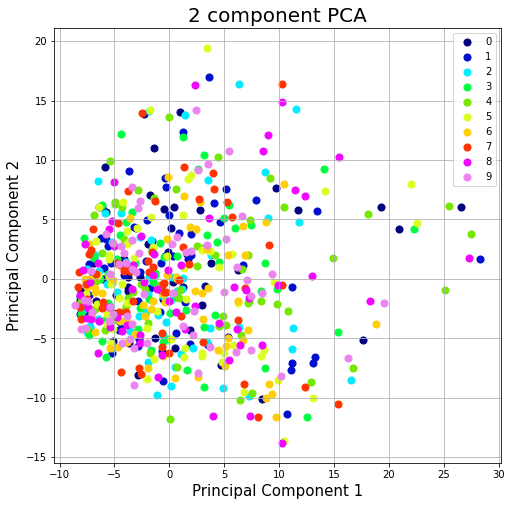

In [82]:
#plottting the principle compenents
import itertools
fig = plt.figure(figsize = (8,8))                           #figure size
ax = fig.add_subplot(1,1,1)                                 #plotting the subplot
ax.set_xlabel('Principal Component 1', fontsize = 15)       #plotting the xlabel 
ax.set_ylabel('Principal Component 2', fontsize = 15)       #plotting the ylabel
ax.set_title('2 component PCA', fontsize = 20)              #plot title name 
targets = ['0','1','2','3','4','5','6','7','8','9']         #target values in the dataframe
colors = itertools.cycle(["r", "b", "g"])                   #mapping the color values                
for target,color in zip(targets,colors):                    #for loop counter                
    indicesToKeep = finalDf['target'] == int(target)         #converting the data frame into the integer value
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1']    #scatter plotting principle component one
               , finalDf.loc[indicesToKeep,'principal component 2']  #scatter plotting principle component two
               , c = color                                           #mapping color
               , s = 50)                                             #declaring size of the plot
colormap = plt.cm.gist_ncar                                          #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]         #setting up the colour map for the plot       
for t,j1 in enumerate(ax.collections):                               #for loop counter
    j1.set_color(colorst[t])                                         #setting up the color for the plot

ax.legend(fontsize='small')                                          #setting the font size
ax.legend(targets)                                                   #adding target legends
ax.grid()                                                            #adding grids

In [83]:
from sklearn.decomposition import PCA  #importing pca 

pca = PCA(n_components=2)       #performing pca with component number 2            

principalComponents_C = pca.fit_transform(X_c)      #performing fit transform

principalDf = pd.DataFrame(data = principalComponents                        #creating an data frame for principle component 1 and 2
             , columns = ['principal component 1', 'principal component 2'])
print('shape of pca_reduced data = ',principalComponents.shape)      #printing the shape of the pca_reduced data
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(principalComponents_C, Y_c, train_size=0.80, random_state=101) #splitting the data to testing and training data
print(x_train_pca.shape) #printing x_train.shape
print(x_test_pca.shape)  #priting x_test.shape
print(y_train_pca.shape) #printing y_train.shape
print(y_test_pca.shape)  #printing y_test.shape  


shape of pca_reduced data =  (42000, 2)
(480, 2)
(120, 2)
(480,)
(120,)


In [85]:
 
svm_linear = svm.SVC(kernel='linear') # an initial SVM model with linear kernel 
svm_linear.fit(x_train_pca, y_train_pca)    # fitting the model

SVC(kernel='linear')

In [87]:
# predict
predictions_pca = svm_linear.predict(x_test_pca)  #predicting the models with test dataset
predictions_pca[:10]    #printing the values

array([2, 5, 0, 2, 2, 8, 0, 9, 1, 7], dtype=int64)

In [89]:

metrics.accuracy_score(y_true=y_test_pca, y_pred=predictions_pca) # measure accuracy report

0.325

In [91]:

class_wise = metrics.classification_report(y_true=y_test_pca, y_pred=predictions_pca)   # class-wise accuracy report
print(class_wise)

              precision    recall  f1-score   support

           0       0.61      0.79      0.69        14
           1       0.65      0.85      0.73        13
           2       0.14      0.29      0.19         7
           3       0.18      0.17      0.17        12
           4       0.00      0.00      0.00        15
           5       0.44      0.25      0.32        16
           6       0.21      0.38      0.27         8
           7       0.20      0.25      0.22         8
           8       0.10      0.07      0.08        15
           9       0.18      0.25      0.21        12

    accuracy                           0.33       120
   macro avg       0.27      0.33      0.29       120
weighted avg       0.28      0.33      0.29       120



Accuracy Score: 0.325
Precision: 0.411
F1 Score: 0.355
Recall Score: 0.325


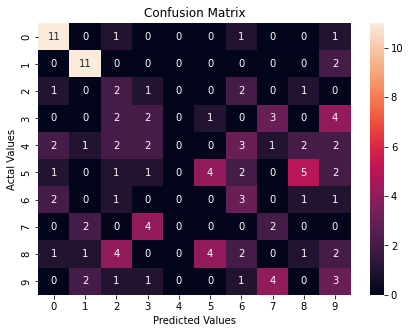

In [92]:
print('Accuracy Score: %.3f' % accuracy_score(predictions_pca, y_test_pca))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(predictions_pca, y_test_pca,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(predictions_pca, y_test_pca, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(predictions_pca, y_test_pca, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test_pca, predictions_pca)        #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                                       #converting the confusion matrix into a dataframe
plt.figure(figsize=(7,5))                                      #declaring the size of the plot
sn.heatmap(cm_df, annot=True)                                  #ploting the confusion matrix
plt.title('Confusion Matrix')                                  #printing the title
plt.ylabel('Actal Values')                                     #printing the ylabel
plt.xlabel('Predicted Values')                                 #printing the xlabel
plt.show()                                                     #ploting the graph

# Grid Search For SVM

In [93]:
m = svm.SVC()     #decalring SVM

param_grid={'C': [10], 'break_ties':[ False], 'cache_size':[ 200], 'class_weight': [None], 'coef0': [0.0], 'decision_function_shape': ['ovr'], 'degree': [3], 'gamma': ['scale'], 'kernel': ['rbf'], 'max_iter': [-1], 'probability': [False], 'random_state': [None], 'shrinking': [True], 'tol': [0.001], 'verbose': [False]} #declaring parameters for the grid search algorithm
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)  #performing the grid search for finding the optimum parameter
   
grid.fit(x_train_pca, y_train_pca)  #training train data on grid model

grid_predictions_pca = grid.predict(x_test_pca)  #making prediction for grid model
grid_predictions_pca #print predicted values
print("accuracy score:",accuracy_score(y_test_pca, grid_predictions_pca)) #print accuracy score
print(metrics.classification_report(y_test_pca, grid_predictions_pca)) #print classfication report

Fitting 5 folds for each of 1 candidates, totalling 5 fits
accuracy score: 0.3416666666666667
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.69      0.85      0.76        13
           2       0.09      0.14      0.11         7
           3       0.06      0.08      0.07        12
           4       0.50      0.13      0.21        15
           5       0.50      0.38      0.43        16
           6       0.23      0.75      0.35         8
           7       0.33      0.25      0.29         8
           8       0.00      0.00      0.00        15
           9       0.20      0.25      0.22        12

    accuracy                           0.34       120
   macro avg       0.34      0.35      0.31       120
weighted avg       0.36      0.34      0.32       120



Accuracy Score: 0.342
Precision: 0.450
F1 Score: 0.358
Recall Score: 0.342


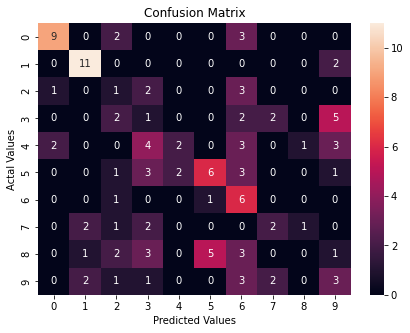

In [94]:
print('Accuracy Score: %.3f' % accuracy_score(grid_predictions_pca, y_test_pca))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(grid_predictions_pca, y_test_pca,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(grid_predictions_pca, y_test_pca, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(grid_predictions_pca, y_test_pca, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test_pca, grid_predictions_pca) #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                                       #converting the confusion matrix into a dataframe
plt.figure(figsize=(7,5))                                      #declaring the size of the plot
sn.heatmap(cm_df, annot=True)                                  #ploting the confusion matrix
plt.title('Confusion Matrix')                                  #printing the title
plt.ylabel('Actal Values')                                     #printing the ylabel
plt.xlabel('Predicted Values')                                 #printing the xlabel
plt.show()                                                     #ploting the graph

# Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB      #importing the library for naieve bayes
model_GNB = GaussianNB()                         #declaring the NB models
model_GNB.fit(x_train_pca,y_train_pca)           #training the model
y_pred_nb_pca = model_GNB.predict(x_test_pca)    #testing the model
accuracy_score(y_pred_nb_pca,y_test_pca)         #printing the accuracy score

0.325

Accuracy Score: 0.325
Precision: 0.505
F1 Score: 0.381
Recall Score: 0.325


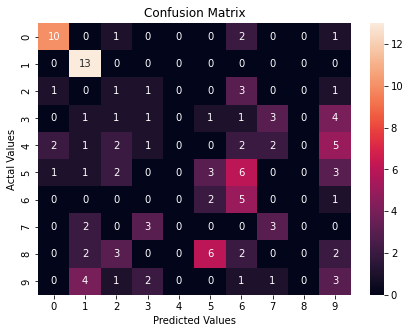

In [96]:
print('Accuracy Score: %.3f' % accuracy_score(y_pred_nb_pca, y_test_pca))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(y_pred_nb_pca, y_test_pca,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(y_pred_nb_pca, y_test_pca, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(y_pred_nb_pca, y_test_pca, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test_pca, y_pred_nb_pca)       #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                               #converting the confusion matrix into a dataframe
plt.figure(figsize=(7,5))                              #declaring the size of the plot
sn.heatmap(cm_df, annot=True)                          #ploting the confusion matrix
plt.title('Confusion Matrix')                          #printing the title
plt.ylabel('Actal Values')                             #printing the ylabel
plt.xlabel('Predicted Values')                         #printing the xlabel
plt.show()                                             #ploting the graph

In [97]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test_pca, y_pred=y_pred_nb_pca) #measure accuracy for the Naive Bayes ml algorithm without using hyper parameters
print(class_wise) #print class_wise report

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.54      1.00      0.70        13
           2       0.09      0.14      0.11         7
           3       0.12      0.08      0.10        12
           4       0.00      0.00      0.00        15
           5       0.25      0.19      0.21        16
           6       0.23      0.62      0.33         8
           7       0.33      0.38      0.35         8
           8       0.00      0.00      0.00        15
           9       0.15      0.25      0.19        12

    accuracy                           0.33       120
   macro avg       0.24      0.34      0.27       120
weighted avg       0.25      0.33      0.27       120



# Grid search for Naive Bayes

In [98]:
from sklearn.model_selection import RepeatedStratifiedKFold          #importing libraries for performing the grid search
from sklearn.preprocessing import PowerTransformer
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)                #declaring the cv parameter for finding optimum parameter for NB
print(np.logspace(0,-9, num=10))
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}            #decalring the varsmooth function

gs_NB = GridSearchCV(estimator=model_GNB,                            #performing the grid search 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_test_pca)     #transforming the data

gs_NB.fit(x_train_pca,y_train_pca)                                  #training the model

print("best hyperparameters:",gs_NB.best_params_)                   #printing best hyper parameters
print("best score:",gs_NB.best_score_)                              #printing the best score
grid_predictions_nbi_pca = gs_NB.predict(x_test_pca)                #testing the grid model

print(metrics.classification_report(y_test_pca, grid_predictions_nbi)) #printing the classification report

[1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09]
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
best hyperparameters: {'var_smoothing': 0.0015199110829529332}
best score: 0.3152777777777777
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.80      0.92      0.86        13
           2       0.75      0.86      0.80         7
           3       1.00      0.83      0.91        12
           4       0.86      0.40      0.55        15
           5       0.50      0.50      0.50        16
           6       0.67      1.00      0.80         8
           7       1.00      0.62      0.77         8
           8       0.67      0.53      0.59        15
           9       0.48      0.92      0.63        12

    accuracy                           0.72       120
   macro avg       0.77      0.74      0.73       120
weighted avg       0.76      0.72      0.71       120



Accuracy Score: 0.325
Precision: 0.505
F1 Score: 0.381
Recall Score: 0.325


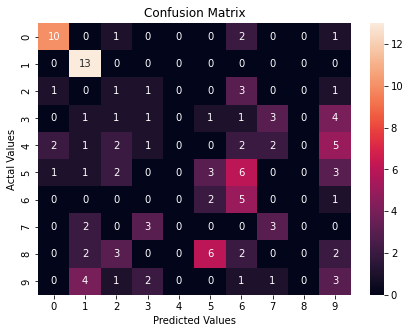

In [99]:
print('Accuracy Score: %.3f' % accuracy_score(grid_predictions_nbi_pca, y_test_pca))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(grid_predictions_nbi_pca, y_test_pca,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(grid_predictions_nbi_pca, y_test_pca, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(grid_predictions_nbi_pca, y_test_pca, average='weighted'))    #predicting the recall score


cm = confusion_matrix(y_test_pca, grid_predictions_nbi_pca)          #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                                       #converting the confusion matrix into a dataframe
plt.figure(figsize=(7,5))                                      #declaring the size of the plot
sn.heatmap(cm_df, annot=True)                                  #ploting the confusion matrix
plt.title('Confusion Matrix')                                  #printing the title
plt.ylabel('Actal Values')                                     #printing the ylabel
plt.xlabel('Predicted Values')                                 #printing the xlabel
plt.show()                                                     #ploting the graph

In [101]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.90, random_state=101)    #resetting the xtrain and xtest

accuracy_score_DSVM=accuracy_score(y_true=y_test, y_pred=grid_predictions)   #calculating the accuracy score of svm for csv dataset
accuracy_score_CSVM=accuracy_score(grid_predictions_pca, y_test_pca)         #calculating the accuracy score of svm for image converted csv dataset
precision_score_DSVM=precision_score(grid_predictions, y_test,average='weighted')       #calculating the precesion score of svm for csv dataset 
precision_score_CSVM=precision_score(grid_predictions_pca,y_test_pca,average='weighted') #calculating the precesion score of svm for image converted csv dataset 
f1_score_DSVM=f1_score(grid_predictions, y_test,average='weighted')                      #calculating the f1 score of svm for csv dataset
f1_score_CSVM=f1_score(grid_predictions_pca, y_test_pca,average='weighted')              #calculating the f1 score of svm for image converted csv data
recall_score_DSVM=recall_score(grid_predictions, y_test,average='weighted')              #calculating the recall score of svm for csv dataset
recall_score_CSVM=recall_score(grid_predictions_pca, y_test_pca,average='weighted')      #calculating the recall score of svm for image converted csv data
data_list = [['accuracy_score', accuracy_score_DSVM, accuracy_score_CSVM],                #making row and column headers
             ['precision_score', precision_score_DSVM, precision_score_CSVM],
             ['f1_score', f1_score_DSVM, f1_score_CSVM],
             ['recall_score', recall_score_DSVM, recall_score_CSVM]]
df_SVM = pd.DataFrame(data=data_list, columns=[
                  'Metric', 'MNIST_Excel_Data', 'PCA_MNIST_Image_Converted_Data'])         #making the dataframe and printing it
df_SVM

,Metric,MNIST_Excel_Data,PCA_MNIST_Image_Converted_Data
0,accuracy_score,0.967143,0.341667
1,precision_score,0.967326,0.449507
2,f1_score,0.967102,0.358498
3,recall_score,0.967143,0.341667


In [102]:
accuracy_score_DNB=accuracy_score(grid_predictions_nb,y_test)              #calculating the accuracy score of nb for csv dataset
accuracy_score_CNB=accuracy_score(grid_predictions_nbi_pca, y_test_pca)    #calculating the accuracy score of nb for image converted csv dataset
precision_score_DNB=precision_score(grid_predictions_nb, y_test,average='weighted')       #calculating the precesion score of nb for csv dataset
precision_score_CNB=precision_score(grid_predictions_nbi_pca, y_test_pca,average='weighted') #calculating the precesion score of nb for image converted csv dataset 
f1_score_DNB=f1_score(grid_predictions_nb, y_test,average='weighted')                         #calculating the f1 score of nb for csv dataset
f1_score_CNB=f1_score(grid_predictions_pca, y_test_pca,average='weighted')                    #calculating the f1 score of nb for image converted csv data 
recall_score_DNB=recall_score(grid_predictions_nb, y_test,average='weighted')                 #calculating the recall score of nb for csv dataset
recall_score_CNB=recall_score(grid_predictions_pca, y_test_pca,average='weighted')            #calculating the recall score of nb for image converted csv data
data_list = [['accuracy_score', accuracy_score_DNB, accuracy_score_CNB],                      #making row and column headers
             ['precision_score', precision_score_DNB, precision_score_CNB],
             ['f1_score', f1_score_DNB, f1_score_CNB],
             ['recall_score', recall_score_DNB, recall_score_CNB]]
df_NB = pd.DataFrame(data=data_list, columns=[
                  'Metric', 'MNIST_Excel_Data', 'PCA_MNIST_Image_Converted_Data'])            #making the dataframe and printing it
df_NB

,Metric,MNIST_Excel_Data,PCA_MNIST_Image_Converted_Data
0,accuracy_score,0.690000,0.325000
1,precision_score,0.762489,0.505109
2,f1_score,0.694611,0.358498
3,recall_score,0.690000,0.341667


In [161]:
from PIL import Image                    #importing librabries for scanning and converting the images to csv
import sys
import os
import csv
from sklearn import preprocessing
columnNames = list()                     

for i in range(784):                     #creating label names for the csv headers
    pixel = 'label'                      #hard coding the pca value
    pixel += str(i)                      #appending the loop counter value to label
    columnNames.append(pixel)            #making column names as pixel

# default format can be changed as needed
def createFileList(myDir, format='.jpg'):                      #logic for going into the directory and fetching the file
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList('C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Self Test') #path for custom image directory
self_train_data = pd.DataFrame(columns = columnNames) #creating data frame with labels as headers
for file in myFileList:                               #loop counter
    print(file)                                       #printing the file name
    img_file = Image.open(file)                       #opening the image file
    img_grey = img_file.convert('L')                  # Make image Greyscale
    rawData = img_grey.load()
    
    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0])) #converting the data into np array  
    value = value.flatten() #flattening the data 
    k = 0
        #print data  
    self_train_data.loc[i] = [value[k] for k in range(784)]          #feeding the above values to traindata variable
    i=i+1
print(self_train_data)                                               #printing the traindata
self_train_data.to_csv("self_train_data.csv",index = False)          #converting the traindata to csv 

C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Self Test
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Self Test\0.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Self Test\1.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Self Test\2.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Self Test\3.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Self Test\4.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Self Test\5.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Self Test\6.jpg
C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Hareesh Sir/ML/Assignment -5/Self 

In [162]:
# read the dataset
self_digits = pd.read_csv('self_train_data.csv')
self_digits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 784 entries, label0 to label783
dtypes: int64(784)
memory usage: 61.4 KB


In [163]:
idx = 0                   #declaring the index values
target = [0,1,2,3,4,5,6,7,8,9]  #declaring the target values
self_digits.insert(loc=idx, column='target', value=target) #adding the above variables into our dataframe
self_digits   #showcasing the dataframe

,target,label0,label1,label2,label3,label4,label5,label6,label7,label8,...,label774,label775,label776,label777,label778,label779,label780,label781,label782,label783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,51,18,19,18,20,19,19,19,20,...,4,2,2,3,3,2,2,2,2,2
2,2,1,0,1,0,0,0,2,10,37,...,1,1,0,0,0,0,0,0,0,0
3,3,0,1,1,7,42,71,108,130,141,...,2,1,0,2,3,0,0,0,0,0
4,4,0,1,1,7,17,42,66,47,29,...,132,88,13,0,0,1,0,0,0,0
5,5,0,1,0,1,0,7,18,27,16,...,2,3,0,1,1,0,0,0,0,0
6,6,0,2,0,0,3,1,3,14,45,...,10,0,0,0,0,0,0,0,0,0
7,7,0,1,12,38,74,98,107,109,104,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,5,9,47,...,34,17,10,1,0,0,0,0,0,0
9,9,0,4,0,0,0,5,36,58,99,...,42,3,1,1,1,0,0,0,0,0


In [170]:
from sklearn.utils import shuffle   #package for shuffling the dataframe
self_digits = shuffle(self_digits)  #shuffling operation
self_digits                         #showcasing the digits after shuffling

,target,label0,label1,label2,label3,label4,label5,label6,label7,label8,...,label774,label775,label776,label777,label778,label779,label780,label781,label782,label783
9,9,0,4,0,0,0,5,36,58,99,...,42,3,1,1,1,0,0,0,0,0
1,1,51,18,19,18,20,19,19,19,20,...,4,2,2,3,3,2,2,2,2,2
2,2,1,0,1,0,0,0,2,10,37,...,1,1,0,0,0,0,0,0,0,0
3,3,0,1,1,7,42,71,108,130,141,...,2,1,0,2,3,0,0,0,0,0
8,8,0,0,0,0,0,0,5,9,47,...,34,17,10,1,0,0,0,0,0,0
7,7,0,1,12,38,74,98,107,109,104,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1,1,7,17,42,66,47,29,...,132,88,13,0,0,1,0,0,0,0
5,5,0,1,0,1,0,7,18,27,16,...,2,3,0,1,1,0,0,0,0,0
6,6,0,2,0,0,3,1,3,14,45,...,10,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
# Creating training and test sets
# Splitting the data into train and test
X_T = self_digits.iloc[:, 1:]
Y_T = self_digits.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X_T = scale(X_T)         #feature scaling the label's column

In [172]:
x_train, x_test, y_train, y_test_C = train_test_split(X_c, Y_c, train_size=0.800, random_state=101)         #resrting xtrain and stest 
svm_linear = svm.SVC(kernel='linear',C=10)      #an initial SVM model with linear kernel )
# fit
svm_linear.fit(x_train, y_train)                #fit the model into the svm_linear model
# predict
predictions_T = svm_linear.predict(X_T)      #predict the values using X_T variables
predictions_T[:10]                           #printing the 10 records

array([9, 3, 2, 5, 8, 4, 2, 8, 0, 1], dtype=int64)

In [173]:
# measure accuracy
metrics.accuracy_score(y_true=Y_T, y_pred=predictions_T)   #measure accuracy for the svm ml algorithm without using hyper parameters

0.3

In [174]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=Y_T, y_pred=predictions_T) #class-wise classification_report for svm_linear model
print(class_wise)                                                            #printing the above report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1

    accuracy                           0.30        10
   macro avg       0.20      0.30      0.23        10
weighted avg       0.20      0.30      0.23        10



Accuracy Score: 0.300
Precision: 0.500
F1 Score: 0.367
Recall Score: 0.300


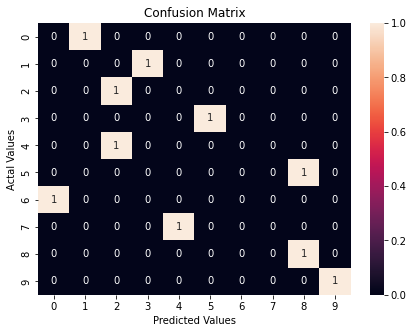

In [175]:
print('Accuracy Score: %.3f' % accuracy_score(predictions_T, Y_T))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(predictions_T, Y_T,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(predictions_T, Y_T, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(predictions_T, Y_T, average='weighted'))    #predicting the recall score


cm = confusion_matrix(Y_T, predictions_T)         #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                         #converting the confusion matrix into a dataframe
plt.figure(figsize=(7,5))                        #declaring the size of the plot
sn.heatmap(cm_df, annot=True)                    #ploting the confusion matrix
plt.title('Confusion Matrix')                    #printing the title
plt.ylabel('Actal Values')                       #printing the ylabel
plt.xlabel('Predicted Values')                   #printing the xlabel
plt.show()                                       #ploting the graph

In [146]:
x_train, x_test, y_train, y_test_C = train_test_split(X_c, Y_c, train_size=0.800, random_state=101)        #creating the test,train dataframe from image converted csv data 
from sklearn.naive_bayes import GaussianNB                   #importing the library for naieve bayes
model_GNB = GaussianNB()                                     #declaring the NB models
model_GNB.fit(x_train,y_train)                               #training the model
y_pred_Tnbc = model_GNB.predict(X_T)                         #testing the model
accuracy_score(y_pred_Tnbc,Y_T)                              #printing the accuracy score

0.1

Accuracy Score: 0.100
Precision: 0.200
F1 Score: 0.133
Recall Score: 0.100


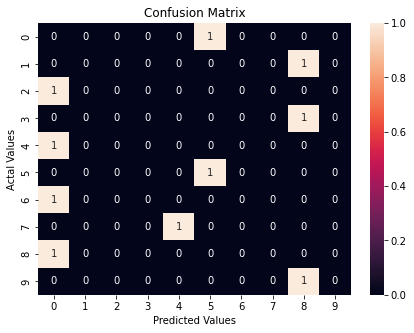

In [147]:
print('Accuracy Score: %.3f' % accuracy_score(y_pred_Tnbc, Y_T))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(y_pred_Tnbc, Y_T,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(y_pred_Tnbc, Y_T, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(y_pred_Tnbc, Y_T, average='weighted'))    #predicting the recall score


cm = confusion_matrix(Y_T, y_pred_Tnbc)                 #declaring the confusion matrix
cm_df = pd.DataFrame(cm)                         #converting the confusion matrix into a dataframe
plt.figure(figsize=(7,5))                        #declaring the size of the plot
sn.heatmap(cm_df, annot=True)                    #ploting the confusion matrix
plt.title('Confusion Matrix')                    #printing the title
plt.ylabel('Actal Values')                       #printing the ylabel
plt.xlabel('Predicted Values')                   #printing the xlabel
plt.show()                                       #ploting the graph

In [150]:
m = svm.SVC()                                    #decalring SVM
param_grid={'C': [10], 'break_ties':[ False], 'cache_size':[ 200], 'class_weight': [None], 'coef0': [0.0], 'decision_function_shape': ['ovr'], 'degree': [3], 'gamma': ['scale'], 'kernel': ['rbf'], 'max_iter': [-1], 'probability': [False], 'random_state': [None], 'shrinking': [True], 'tol': [0.001], 'verbose': [False]}   #declaring parameters for the grid search algorithm
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)  #performing the grid search for finding the optimum parameter
grid.fit(x_train, y_train)                 
grid_predictions = grid.predict(X_T)        #making prediction for grid model
print("best",grid.best_params_)     

Fitting 5 folds for each of 1 candidates, totalling 5 fits
best {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [156]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=Y_T, y_pred=grid_predictions) # class-wise classification_report for svm_linear model
print(class_wise)  #printing the above report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.33      1.00      0.50         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1

    accuracy                           0.20        10
   macro avg       0.13      0.20      0.15        10
weighted avg       0.13      0.20      0.15        10

